In [1]:
#File Importing and Setting Data 
import numpy as np
import pandas as pd
from scipy import interp
file=pd.read_csv('gene.csv',low_memory=False)
working=file.drop('ID',axis=1)
X=working.drop('Class',axis=1)
y=working['Class']
X=np.c_[X]
type(X)

numpy.ndarray

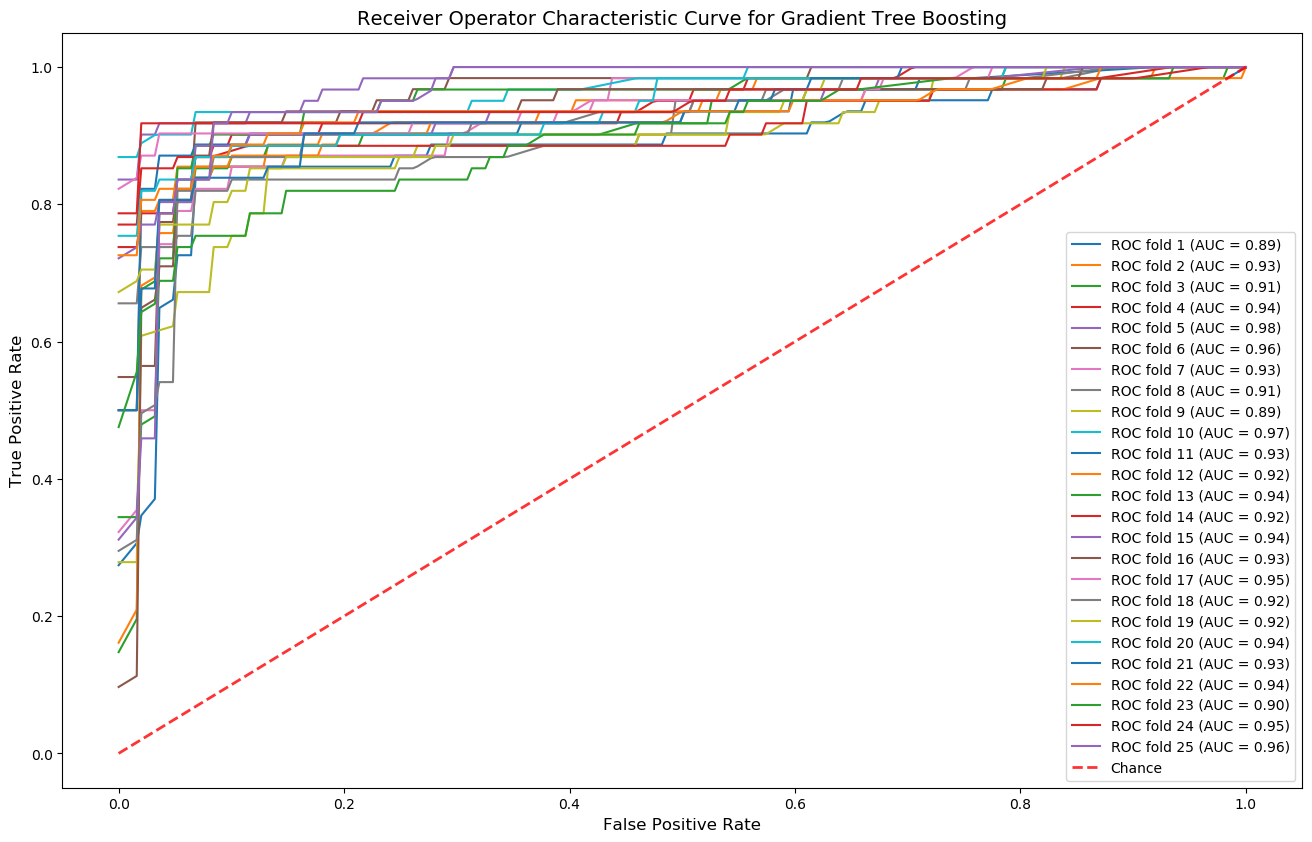

In [2]:
#Model and ROC plot
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(47568)
classifier=GradientBoostingClassifier(max_depth=4,learning_rate=0.05,n_estimators=80,loss='exponential')
aucs=[]
fprm=[]
tprm=[]
tprm1=[]
fprm1=[]
mean_fpr = np.linspace(0,1,250)
plt.figure(figsize=(16, 10), dpi=100, facecolor='w', edgecolor='k')
i = 1
for loops in range(0,5):
    cv=StratifiedKFold(n_splits=5,shuffle=True)
    for train, test in cv.split(X, y):
        model= classifier.fit(X[train], y[train])
        prob=model.predict_proba(X[test])
# Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], prob[:, 1])
        tprm=interp(mean_fpr, fpr, tpr)
        fprm=list(mean_fpr)
        tprm=list(tprm)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tprm1.extend(tprm)
        fprm1.extend(fprm)
        mean_tpr = np.mean(tprm, axis=0)
        plt.plot(fprm, tprm, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
std_auc = np.std(aucs)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',size=12)
plt.ylabel('True Positive Rate',size=12)
plt.title('Receiver Operator Characteristic Curve for Gradient Tree Boosting',size=14)
plt.legend(loc="lower right")
plt.savefig('GTB.png',dpi=100)

In [3]:
print(sum(aucs)/25)
np.std(aucs)

0.9319667880446807


0.023163996703847594

In [4]:
concat=pd.DataFrame(list(zip(tprm1,fprm1)),columns=['tpr','fpr'])
concat.to_csv('GTBBest.csv')
#Curve Averaging and Error bars done in R